# Topico 14 - Transformada Discreta de Cosseno

Alunos: Alejo Perdomo Milar & João Mário C. I. Lago

In [161]:
%pip install -q numpy scipy matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1 - Considere o sinal de entrada x=[2, 3, 1, 7]. Aplicando a DCT, o sinal transformado é:

In [162]:
import numpy as np
from scipy.fft import dct

x = np.array([2, 3, 1, 7])

print("Sinal de entrada x =", x)

X = dct(x)

print("Sinal transformado (DCT):", np.round(X, 2))


Sinal de entrada x = [2 3 1 7]
Sinal transformado (DCT): [26.   -7.71  7.07 -7.52]


## 2 - Defina duas funções, uma para a DCT e outra para a IDCT para sinais bidimensionais e aplique a DCT na imagem [Coins](assets/coins.jpg) (em toda a imagem de uma só vez) e grave o resultado como uma imagem (com mapa de cores gray). Observe em que região se concentra a maior parte da energia.

### Definição de (DCT e IDCT)

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dct, idct
from PIL import Image
import os

def dct2(a):
    return dct(dct(a, axis=0, norm='ortho'), axis=1, norm='ortho')

def idct2(a):
    return idct(idct(a, axis=0, norm='ortho'), axis=1, norm='ortho')


### Carregamento da imagem original

Dimensões da imagem: (238, 294)
Tipo: float64
Valores min/max: 17.00 / 255.00


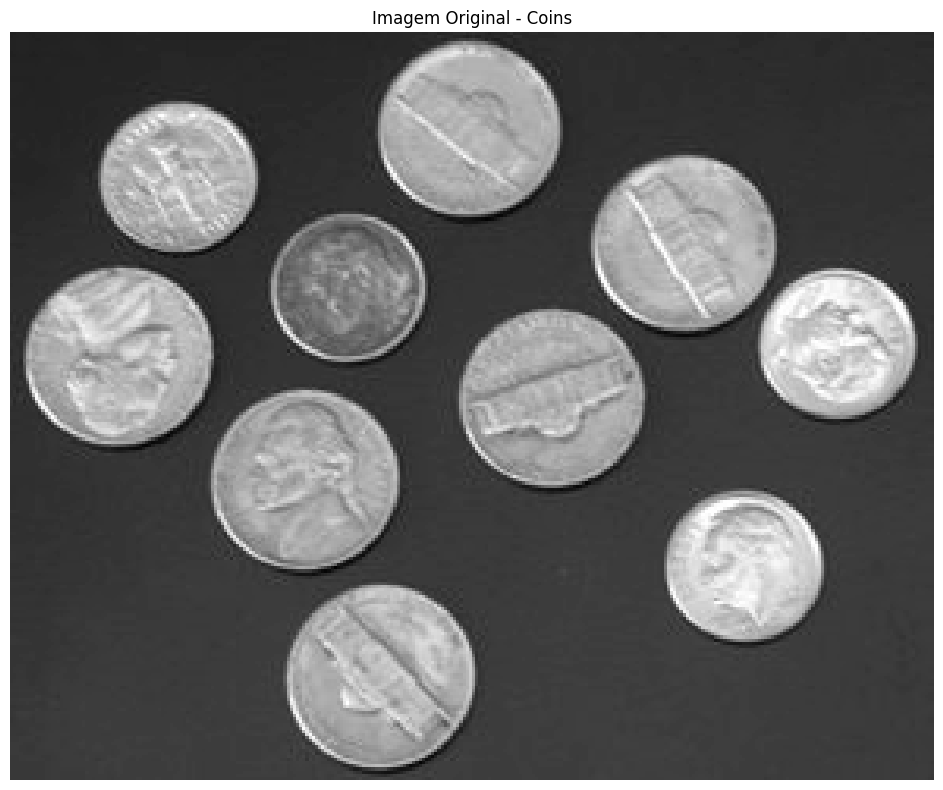

In [164]:
image_path = 'assets/coins.jpg'

# Carrega a imagem e converte para escala de cinza
im = np.array(Image.open(image_path).convert('L')).astype(float)

print(f"Dimensões da imagem: {im.shape}")
print(f"Tipo: {im.dtype}")
print(f"Valores min/max: {im.min():.2f} / {im.max():.2f}")

# Visualiza a imagem original
plt.figure(figsize=(10, 8))
plt.imshow(im, cmap='gray')
plt.title('Imagem Original - Coins')
plt.axis('off')
plt.tight_layout()
plt.show()


### Aplicação da DCT (Toda a imagem de uma só vez)

Dimensões dos coeficientes DCT: (238, 294)
Valores min/max dos coeficientes: -3942.39 / 27771.59


(-0.5, 293.5, 237.5, -0.5)

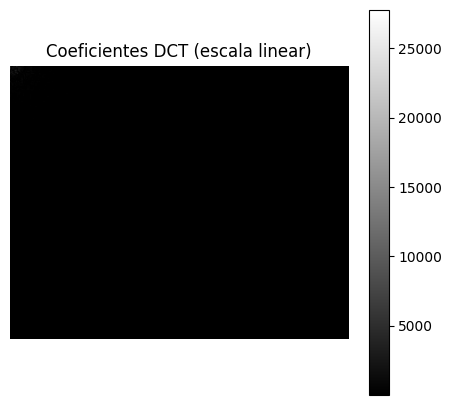

In [165]:
# Aplica DCT 2D em toda a imagem de uma vez
dct_coeffs = dct2(im)

print(f"Dimensões dos coeficientes DCT: {dct_coeffs.shape}")
print(f"Valores min/max dos coeficientes: {dct_coeffs.min():.2f} / {dct_coeffs.max():.2f}")

# Visualiza os coeficientes DCT (usando escala logarítmica para melhor visualização)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(dct_coeffs), cmap='gray')
plt.title('Coeficientes DCT (escala linear)')
plt.colorbar()
plt.axis('off')


### Análise da distribuição de energia

Energia total: 9.96e+08

Distribuição de Energia por Região (canto superior esquerdo)
8x8            :  91.29% da energia total
16x16          :  95.76% da energia total
32x32          :  97.94% da energia total
64x64          :  99.00% da energia total
59x73          :  99.04% da energia total
119x147        :  99.78% da energia total


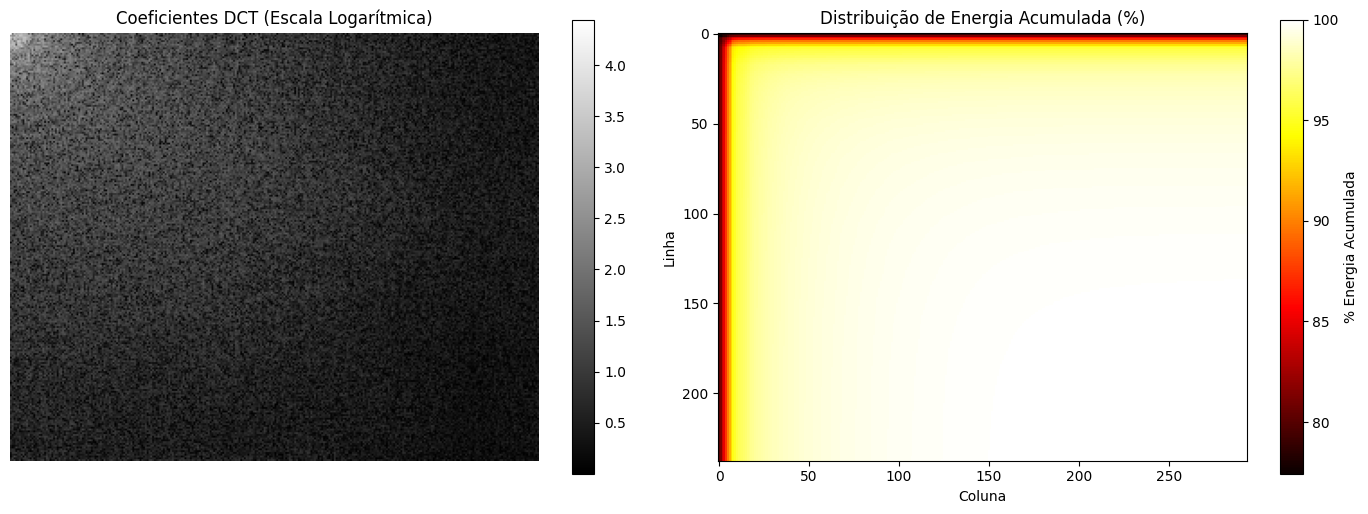


Coeficiente DC (0,0): 27771.59
Energia no coeficiente DC: 7.71e+08 (77.43% do total)


In [166]:
# Análise da distribuição de energia
# A energia é proporcional ao quadrado dos coeficientes
energy = np.abs(dct_coeffs) ** 2
total_energy = np.sum(energy)

print(f"Energia total: {total_energy:.2e}")

# Calcula a energia acumulada a partir do canto superior esquerdo
# (onde tipicamente se concentra a maior parte da energia na DCT)
rows, cols = energy.shape
energy_cumulative = np.zeros((rows, cols))

# Preenche a matriz de energia acumulada
for i in range(rows):
    for j in range(cols):
        if i == 0 and j == 0:
            energy_cumulative[i, j] = energy[i, j]
        elif i == 0:
            energy_cumulative[i, j] = energy_cumulative[i, j-1] + energy[i, j]
        elif j == 0:
            energy_cumulative[i, j] = energy_cumulative[i-1, j] + energy[i, j]
        else:
            energy_cumulative[i, j] = (energy_cumulative[i-1, j] +
                                      energy_cumulative[i, j-1] -
                                      energy_cumulative[i-1, j-1] +
                                      energy[i, j])

# Calcula a porcentagem de energia em diferentes regiões
energy_percentage = (energy_cumulative / total_energy) * 100

# Analisa diferentes tamanhos de região no canto superior esquerdo
regions = [
    (8, 8, "8x8"),
    (16, 16, "16x16"),
    (32, 32, "32x32"),
    (64, 64, "64x64"),
    (rows//4, cols//4, f"{rows//4}x{cols//4}"),
    (rows//2, cols//2, f"{rows//2}x{cols//2}"),
]

print("\n" + "="*60)
print("Distribuição de Energia por Região (canto superior esquerdo)")
print("="*60)
for h, w, label in regions:
    if h <= rows and w <= cols:
        energy_in_region = energy_cumulative[h-1, w-1]
        percentage = (energy_in_region / total_energy) * 100
        print(f"{label:15s}: {percentage:6.2f}% da energia total")

# Visualiza a distribuição de energia
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# Usa escala logarítmica para melhor visualização
dct_log = np.log10(np.abs(dct_coeffs) + 1)  # +1 para evitar log(0)
plt.imshow(dct_log, cmap='gray')
plt.title('Coeficientes DCT (Escala Logarítmica)')
plt.colorbar()
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(energy_percentage, cmap='hot', interpolation='nearest')
plt.colorbar(label='% Energia Acumulada')
plt.title('Distribuição de Energia Acumulada (%)')
plt.xlabel('Coluna')
plt.ylabel('Linha')

plt.tight_layout()
plt.savefig('generated/coins_dct_and_energy.png')
plt.show()

# Mostra onde está o coeficiente DC (canto superior esquerdo)
print(f"\nCoeficiente DC (0,0): {dct_coeffs[0, 0]:.2f}")
print(f"Energia no coeficiente DC: {energy[0, 0]:.2e} ({energy[0, 0]/total_energy*100:.2f}% do total)")


### Reconstrução da imagem original (IDCT)

Erro máximo de reconstrução: 2.27e-13
Erro médio de reconstrução: 4.90e-14


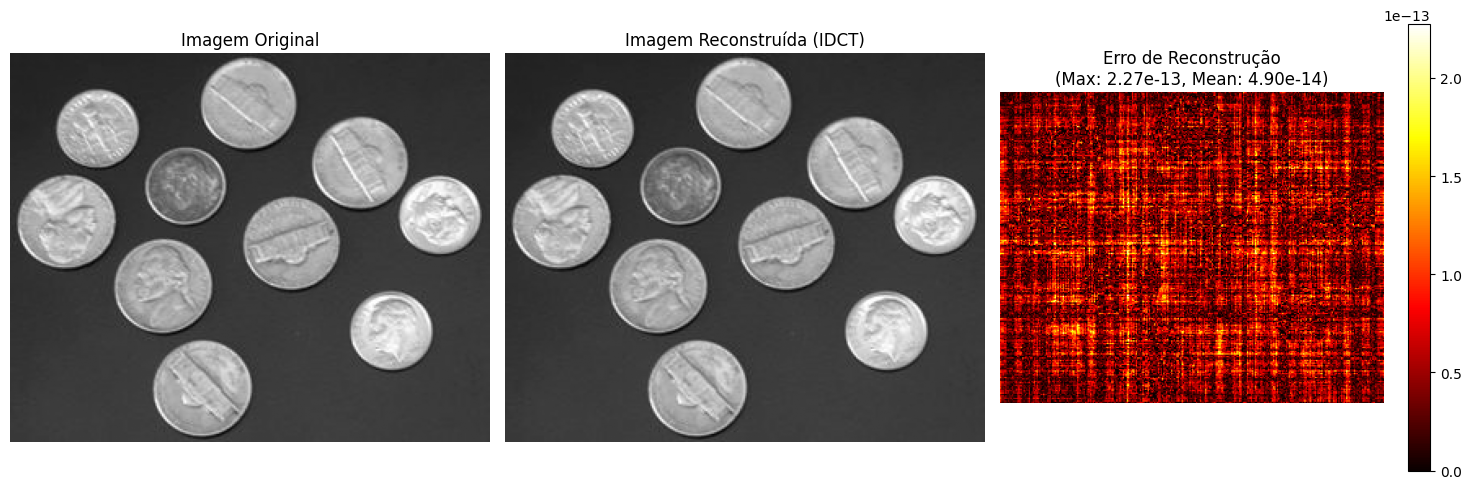

In [167]:
im_reconstructed = idct2(dct_coeffs)

# Calcula o erro de reconstrução
reconstruction_error = np.abs(im - im_reconstructed)
max_error = np.max(reconstruction_error)
mean_error = np.mean(reconstruction_error)

print(f"Erro máximo de reconstrução: {max_error:.2e}")
print(f"Erro médio de reconstrução: {mean_error:.2e}")

# Visualiza a reconstrução
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(im, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(im_reconstructed, cmap='gray')
plt.title('Imagem Reconstruída (IDCT)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstruction_error, cmap='hot')
plt.title(f'Erro de Reconstrução\n(Max: {max_error:.2e}, Mean: {mean_error:.2e})')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()


## 3 - Aplique a DCT NÃO da imagem como um todo, mas em blocos de 8x8 pixels da [Coins](assets/coins.jpg), como mostrado no código abaixo.

```python
#Fonte: https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

# Threshold
thresh = 0.1
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))
```

## Depois, aplique um limiar (thresh no código abaixo) de 0,01 sobre os coeficientes da transformada. Grave a imagem resultante e mande no espaço disponível abaixo.

### Responda:

* a) qual o percentual de coeficientes que são efetivamente utilizados.

* b) qual sua impressão visual sobre o resultado.

### Aplicação da DCT

Dimensões da imagem: (238, 294)
DCT aplicada em blocos de 8x8
Valores min/max dos coeficientes DCT: -539.75 / 1870.38
Threshold aplicado: 0.01 (1.0% do valor máximo)
Valor máximo absoluto dos coeficientes: 1870.38
Limiar de corte: 18.70

RESULTADO DO THRESHOLD:
Coeficientes não-zero: 6856 de 69972
Percentual de coeficientes utilizados: 9.80%
Percentual de coeficientes descartados: 90.20%


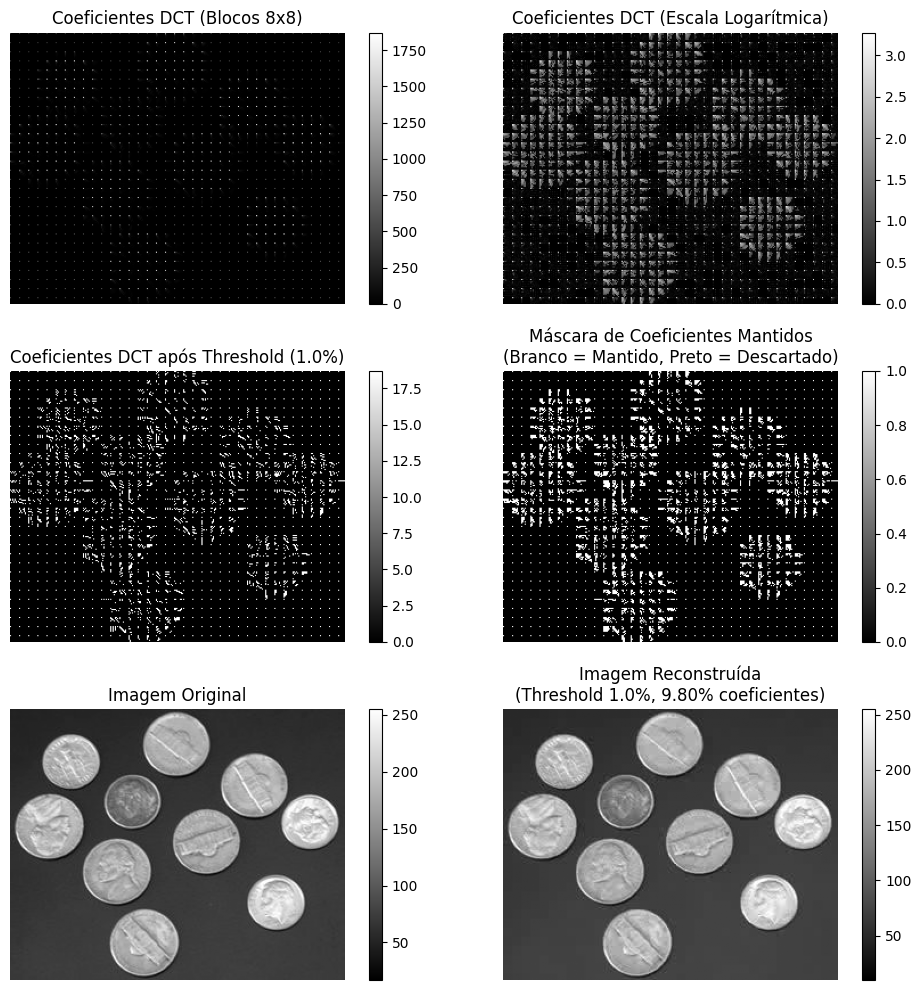

In [168]:
# Aplica DCT em blocos de 8x8 pixels
imsize = im.shape
dct_blocks = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
# r_ é equivalente a np.arange, mas permite slicing mais flexível
from numpy import r_

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        # Garante que não ultrapasse os limites da imagem
        end_i = min(i+8, imsize[0])
        end_j = min(j+8, imsize[1])
        dct_blocks[i:end_i, j:end_j] = dct2(im[i:end_i, j:end_j])

print(f"Dimensões da imagem: {imsize}")
print(f"DCT aplicada em blocos de 8x8")
print(f"Valores min/max dos coeficientes DCT: {dct_blocks.min():.2f} / {dct_blocks.max():.2f}")

# Visualiza os coeficientes DCT dos blocos
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(np.abs(dct_blocks), cmap='gray')
plt.title('Coeficientes DCT (Blocos 8x8)')
plt.colorbar()
plt.axis('off')

plt.subplot(3, 2, 2)
# Escala logarítmica para melhor visualização
dct_blocks_log = np.log10(np.abs(dct_blocks) + 1)
plt.imshow(dct_blocks_log, cmap='gray')
plt.title('Coeficientes DCT (Escala Logarítmica)')
plt.colorbar()
plt.axis('off')


# Aplica threshold de 0.01 sobre os coeficientes
thresh = 0.01
dct_thresh = dct_blocks * (np.abs(dct_blocks) > (thresh * np.max(np.abs(dct_blocks))))

print(f"Threshold aplicado: {thresh} ({thresh*100}% do valor máximo)")
print(f"Valor máximo absoluto dos coeficientes: {np.max(np.abs(dct_blocks)):.2f}")
print(f"Limiar de corte: {thresh * np.max(np.abs(dct_blocks)):.2f}")

# Calcula o percentual de coeficientes não-zero
percent_nonzeros = np.sum(dct_thresh != 0.0) / (imsize[0] * imsize[1] * 1.0)

print(f"\n{'='*60}")
print(f"RESULTADO DO THRESHOLD:")
print(f"{'='*60}")
print(f"Coeficientes não-zero: {np.sum(dct_thresh != 0.0)} de {imsize[0] * imsize[1]}")
print(f"Percentual de coeficientes utilizados: {percent_nonzeros * 100.0:.2f}%")
print(f"Percentual de coeficientes descartados: {(1 - percent_nonzeros) * 100.0:.2f}%")

plt.subplot(3, 2, 3)
plt.imshow(dct_thresh, cmap='gray', vmax=np.max(np.abs(dct_blocks))*0.01, vmin=0)
plt.title(f'Coeficientes DCT após Threshold ({thresh*100}%)')
plt.colorbar()
plt.axis('off')

plt.subplot(3, 2, 4)
# Mostra quais coeficientes foram mantidos (binário)
coeff_mask = (dct_thresh != 0.0).astype(float)
plt.imshow(coeff_mask, cmap='gray')
plt.title('Máscara de Coeficientes Mantidos\n(Branco = Mantido, Preto = Descartado)')
plt.colorbar()
plt.axis('off')

# Reconstrói a imagem usando IDCT dos coeficientes com threshold
im_reconstructed_thresh = np.zeros(imsize)

# Aplica IDCT em blocos de 8x8
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        end_i = min(i+8, imsize[0])
        end_j = min(j+8, imsize[1])
        im_reconstructed_thresh[i:end_i, j:end_j] = idct2(dct_thresh[i:end_i, j:end_j])

# Garante que os valores estão no range válido [0, 255]
im_reconstructed_thresh = np.clip(im_reconstructed_thresh, 0, 255)

# Calcula métricas de qualidade
mse = np.mean((im - im_reconstructed_thresh) ** 2)
psnr = 20 * np.log10(255.0 / np.sqrt(mse)) if mse > 0 else float('inf')

plt.subplot(3, 2, 5)
plt.imshow(im, cmap='gray')
plt.title('Imagem Original')
plt.colorbar()
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(im_reconstructed_thresh, cmap='gray')
plt.title(f'Imagem Reconstruída\n(Threshold {thresh*100}%, {percent_nonzeros*100:.2f}% coeficientes)')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.savefig('generated/coins_dct_blocks_8x8_threshold_0.01.png')
plt.show()


### Reconstrução da imagem original (IDCT)

### Salva a imagem reconstruída

Imagem reconstruída salva em: generated/coins_reconstructed_thresh_0.01.png


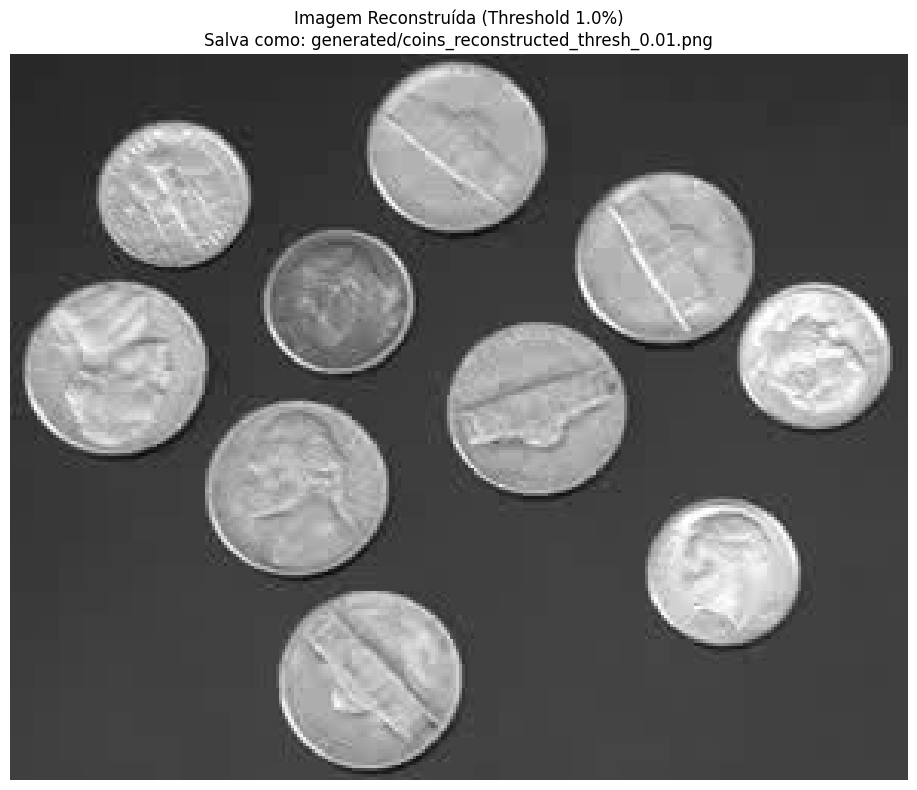

In [169]:
# Salva a imagem reconstruída
output_path_thresh = 'generated/coins_reconstructed_thresh_0.01.png'
os.makedirs('generated', exist_ok=True)

# Converte para uint8 e salva
im_save = im_reconstructed_thresh.astype(np.uint8)
Image.fromarray(im_save).save(output_path_thresh)

print(f"Imagem reconstruída salva em: {output_path_thresh}")

# Visualiza a imagem salva
plt.figure(figsize=(10, 8))
plt.imshow(im_save, cmap='gray')
plt.title(f'Imagem Reconstruída (Threshold {thresh*100}%)\nSalva como: {output_path_thresh}')
plt.axis('off')
plt.tight_layout()
plt.show()


### Respostas:

**a) Percentual de coeficientes efetivamente utilizados:**

O percentual de coeficientes utilizados após aplicar o threshold de 0.01 é 9.8%

**b) Impressão visual sobre o resultado:**

A imagem reconstruída mantém a maior parte da qualidade visual, pois a DCT concentra a energia nas baixas frequências (canto superior esquerdo de cada bloco 8x8). O threshold de 0.01 descarta principalmente os coeficientes de alta frequência, que representam detalhes finos e ruído. 

Observações:
- A imagem reconstruída apresenta uma leve perda de detalhes finos
- Bordas e texturas podem aparecer ligeiramente suavizadas
- A compressão é eficiente, mantendo apenas uma pequena fração dos coeficientes
- O método é similar ao usado no padrão JPEG, que também usa DCT em blocos 8x8


### Análise adicional: comparação lado a lado com zoom em uma região

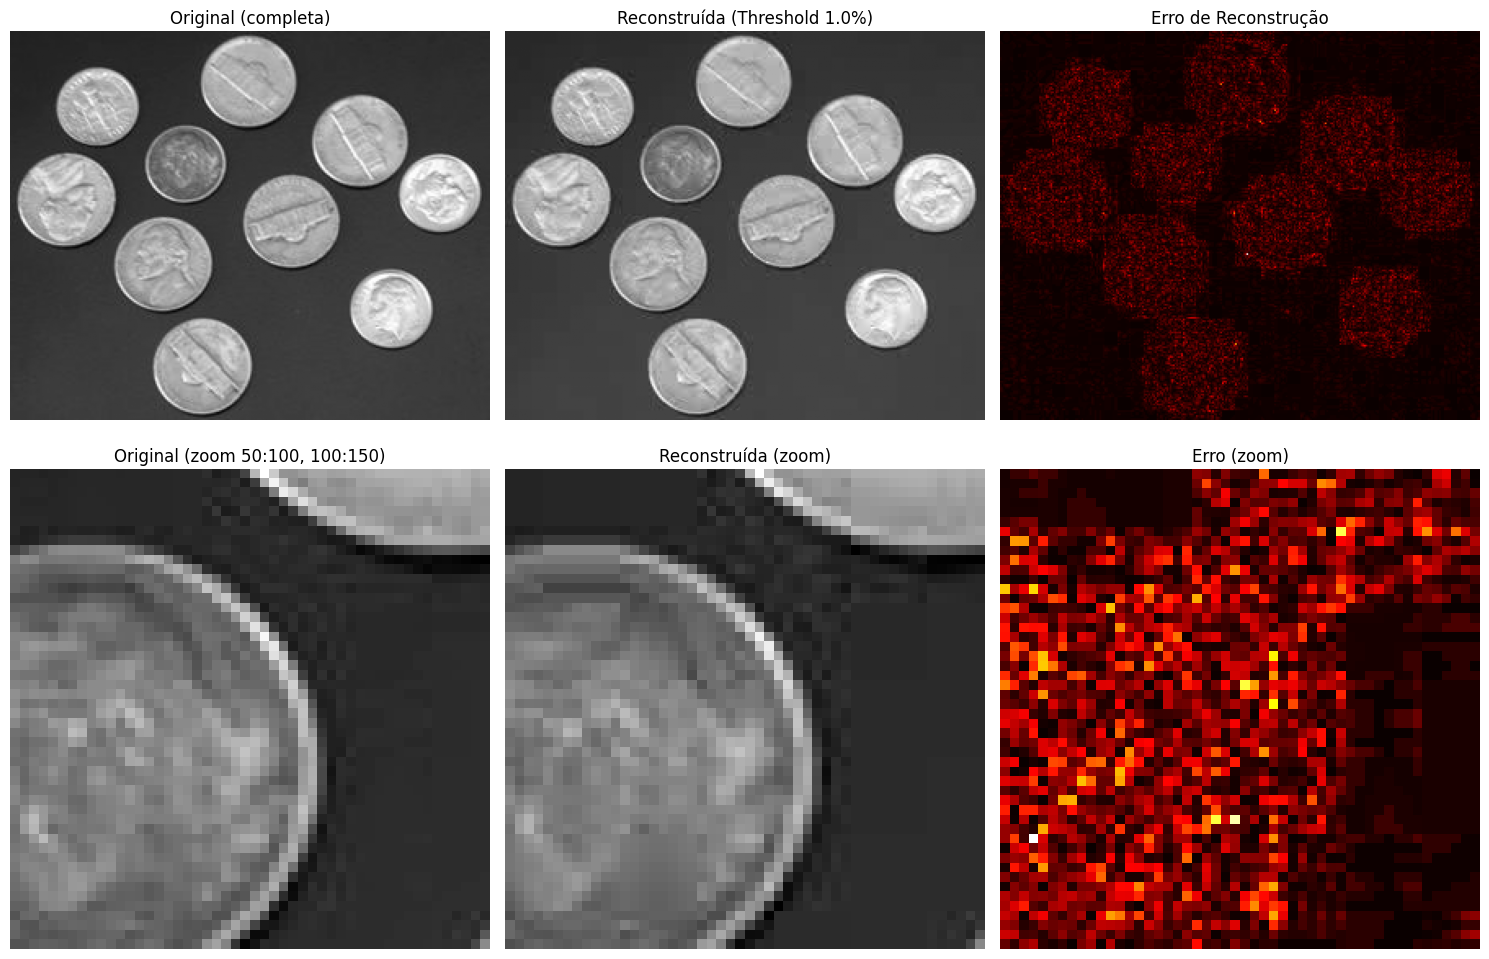


Análise de uma região específica (50:100, 100:150):
Erro médio na região: 2.97
Erro máximo na região: 21.24


In [170]:
# Análise adicional: comparação lado a lado com zoom em uma região
# Seleciona uma região interessante para análise detalhada
zoom_region = (50, 100, 100, 150)  # (y1, y2, x1, x2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Linha 1: Imagens completas
axes[0, 0].imshow(im, cmap='gray')
axes[0, 0].set_title('Original (completa)')
axes[0, 0].axis('off')

axes[0, 1].imshow(im_reconstructed_thresh, cmap='gray')
axes[0, 1].set_title(f'Reconstruída (Threshold {thresh*100}%)')
axes[0, 1].axis('off')

axes[0, 2].imshow(error, cmap='hot')
axes[0, 2].set_title('Erro de Reconstrução')
axes[0, 2].axis('off')

# Linha 2: Zoom na região selecionada
y1, y2, x1, x2 = zoom_region
axes[1, 0].imshow(im[y1:y2, x1:x2], cmap='gray')
axes[1, 0].set_title(f'Original (zoom {y1}:{y2}, {x1}:{x2})')
axes[1, 0].axis('off')

axes[1, 1].imshow(im_reconstructed_thresh[y1:y2, x1:x2], cmap='gray')
axes[1, 1].set_title('Reconstruída (zoom)')
axes[1, 1].axis('off')

axes[1, 2].imshow(error[y1:y2, x1:x2], cmap='hot')
axes[1, 2].set_title('Erro (zoom)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAnálise de uma região específica ({y1}:{y2}, {x1}:{x2}):")
print(f"Erro médio na região: {np.mean(error[y1:y2, x1:x2]):.2f}")
print(f"Erro máximo na região: {np.max(error[y1:y2, x1:x2]):.2f}")


## 4 - Agora, aplique um outro limiar (thresh no código) de 0,2 sobre os coeficientes da transformada.

### Responda:

* a) qual o percentual de coeficientes que são efetivamente utilizados.

* b) qual sua impressão visual sobre o resultado.

### Aplicação da DCT

Dimensões da imagem: (238, 294)
DCT aplicada em blocos de 8x8
Valores min/max dos coeficientes DCT: -539.75 / 1870.38
Threshold aplicado: 0.2 (20.0% do valor máximo)
Valor máximo absoluto dos coeficientes: 1870.38
Limiar de corte: 374.08

RESULTADO DO THRESHOLD:
Coeficientes não-zero: 1132 de 69972
Percentual de coeficientes utilizados: 1.62%
Percentual de coeficientes descartados: 98.38%


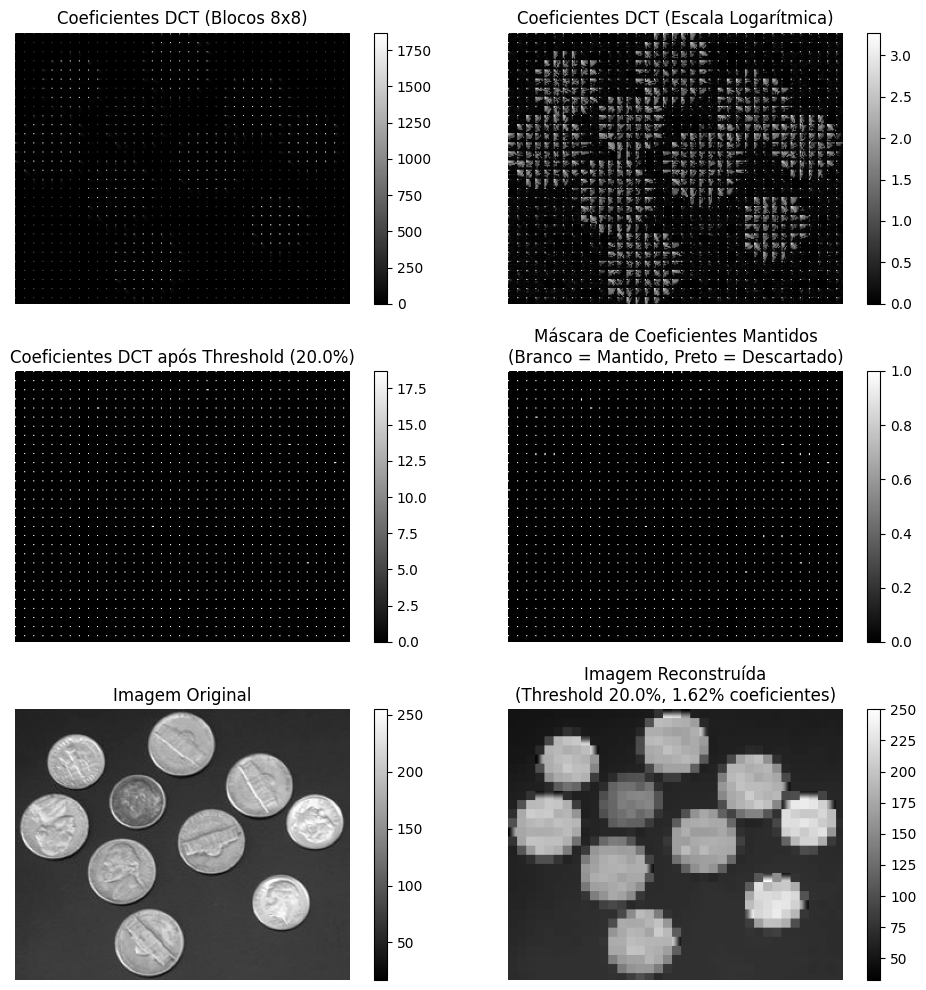

In [171]:
# Aplica DCT em blocos de 8x8 pixels
imsize = im.shape
dct_blocks = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
# r_ é equivalente a np.arange, mas permite slicing mais flexível
from numpy import r_

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        # Garante que não ultrapasse os limites da imagem
        end_i = min(i+8, imsize[0])
        end_j = min(j+8, imsize[1])
        dct_blocks[i:end_i, j:end_j] = dct2(im[i:end_i, j:end_j])

print(f"Dimensões da imagem: {imsize}")
print(f"DCT aplicada em blocos de 8x8")
print(f"Valores min/max dos coeficientes DCT: {dct_blocks.min():.2f} / {dct_blocks.max():.2f}")

# Visualiza os coeficientes DCT dos blocos
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(np.abs(dct_blocks), cmap='gray')
plt.title('Coeficientes DCT (Blocos 8x8)')
plt.colorbar()
plt.axis('off')

plt.subplot(3, 2, 2)
# Escala logarítmica para melhor visualização
dct_blocks_log = np.log10(np.abs(dct_blocks) + 1)
plt.imshow(dct_blocks_log, cmap='gray')
plt.title('Coeficientes DCT (Escala Logarítmica)')
plt.colorbar()
plt.axis('off')


# Aplica threshold de 0.2 sobre os coeficientes
thresh = 0.2
dct_thresh = dct_blocks * (np.abs(dct_blocks) > (thresh * np.max(np.abs(dct_blocks))))

print(f"Threshold aplicado: {thresh} ({thresh*100}% do valor máximo)")
print(f"Valor máximo absoluto dos coeficientes: {np.max(np.abs(dct_blocks)):.2f}")
print(f"Limiar de corte: {thresh * np.max(np.abs(dct_blocks)):.2f}")

# Calcula o percentual de coeficientes não-zero
percent_nonzeros = np.sum(dct_thresh != 0.0) / (imsize[0] * imsize[1] * 1.0)

print(f"\n{'='*60}")
print(f"RESULTADO DO THRESHOLD:")
print(f"{'='*60}")
print(f"Coeficientes não-zero: {np.sum(dct_thresh != 0.0)} de {imsize[0] * imsize[1]}")
print(f"Percentual de coeficientes utilizados: {percent_nonzeros * 100.0:.2f}%")
print(f"Percentual de coeficientes descartados: {(1 - percent_nonzeros) * 100.0:.2f}%")

plt.subplot(3, 2, 3)
plt.imshow(dct_thresh, cmap='gray', vmax=np.max(np.abs(dct_blocks))*0.01, vmin=0)
plt.title(f'Coeficientes DCT após Threshold ({thresh*100}%)')
plt.colorbar()
plt.axis('off')

plt.subplot(3, 2, 4)
# Mostra quais coeficientes foram mantidos (binário)
coeff_mask = (dct_thresh != 0.0).astype(float)
plt.imshow(coeff_mask, cmap='gray')
plt.title('Máscara de Coeficientes Mantidos\n(Branco = Mantido, Preto = Descartado)')
plt.colorbar()
plt.axis('off')

# Reconstrói a imagem usando IDCT dos coeficientes com threshold
im_reconstructed_thresh = np.zeros(imsize)

# Aplica IDCT em blocos de 8x8
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        end_i = min(i+8, imsize[0])
        end_j = min(j+8, imsize[1])
        im_reconstructed_thresh[i:end_i, j:end_j] = idct2(dct_thresh[i:end_i, j:end_j])

# Garante que os valores estão no range válido [0, 255]
im_reconstructed_thresh = np.clip(im_reconstructed_thresh, 0, 255)

# Calcula métricas de qualidade
mse = np.mean((im - im_reconstructed_thresh) ** 2)
psnr = 20 * np.log10(255.0 / np.sqrt(mse)) if mse > 0 else float('inf')

plt.subplot(3, 2, 5)
plt.imshow(im, cmap='gray')
plt.title('Imagem Original')
plt.colorbar()
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(im_reconstructed_thresh, cmap='gray')
plt.title(f'Imagem Reconstruída\n(Threshold {thresh*100}%, {percent_nonzeros*100:.2f}% coeficientes)')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.savefig('generated/coins_dct_blocks_8x8_threshold_0.2.png')
plt.show()


### Reconstrução da imagem original (IDCT)

MSE (Mean Squared Error): 402.08
PSNR (Peak Signal-to-Noise Ratio): 22.09 dB


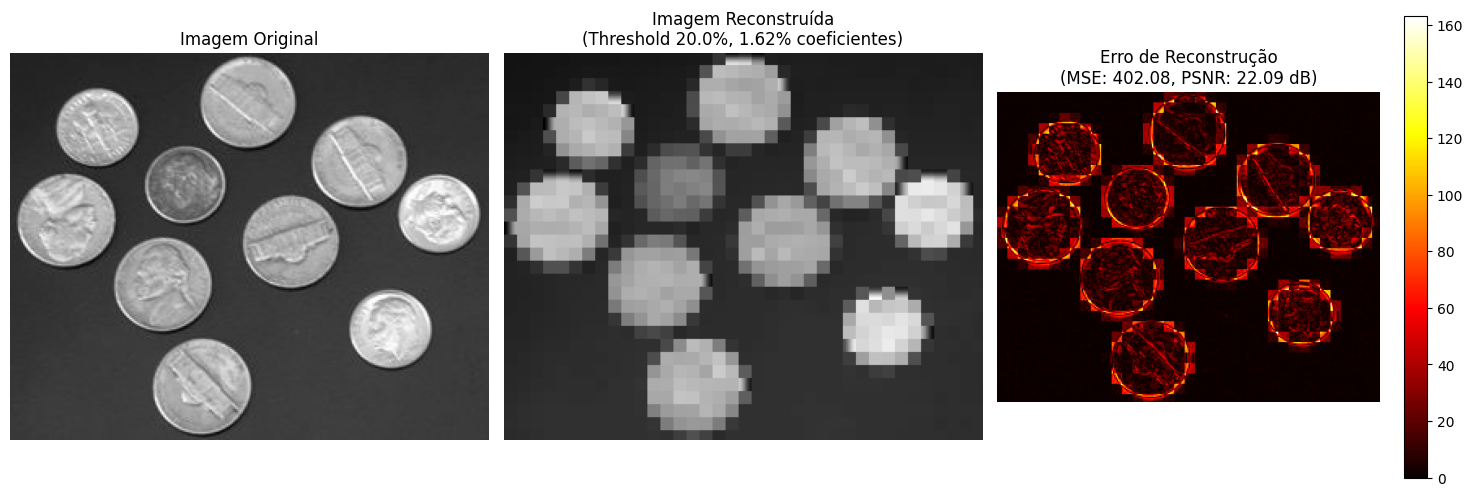

In [172]:
# Reconstrói a imagem usando IDCT dos coeficientes com threshold 0.2
im_reconstructed_thresh_02 = np.zeros(imsize)

# Aplica IDCT em blocos de 8x8
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        end_i = min(i+8, imsize[0])
        end_j = min(j+8, imsize[1])
        im_reconstructed_thresh_02[i:end_i, j:end_j] = idct2(dct_thresh_02[i:end_i, j:end_j])

# Garante que os valores estão no range válido [0, 255]
im_reconstructed_thresh_02 = np.clip(im_reconstructed_thresh_02, 0, 255)

# Calcula métricas de qualidade
mse_02 = np.mean((im - im_reconstructed_thresh_02) ** 2)
psnr_02 = 20 * np.log10(255.0 / np.sqrt(mse_02)) if mse_02 > 0 else float('inf')

print(f"MSE (Mean Squared Error): {mse_02:.2f}")
print(f"PSNR (Peak Signal-to-Noise Ratio): {psnr_02:.2f} dB")

# Visualiza comparação
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(im, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(im_reconstructed_thresh_02, cmap='gray')
plt.title(f'Imagem Reconstruída\n(Threshold {thresh_02*100}%, {percent_nonzeros_02*100:.2f}% coeficientes)')
plt.axis('off')

plt.subplot(1, 3, 3)
error_02 = np.abs(im - im_reconstructed_thresh_02)
plt.imshow(error_02, cmap='hot')
plt.title(f'Erro de Reconstrução\n(MSE: {mse_02:.2f}, PSNR: {psnr_02:.2f} dB)')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()


### Salva a imagem reconstruída

Imagem reconstruída salva em: generated/coins_reconstructed_thresh_0.2.png


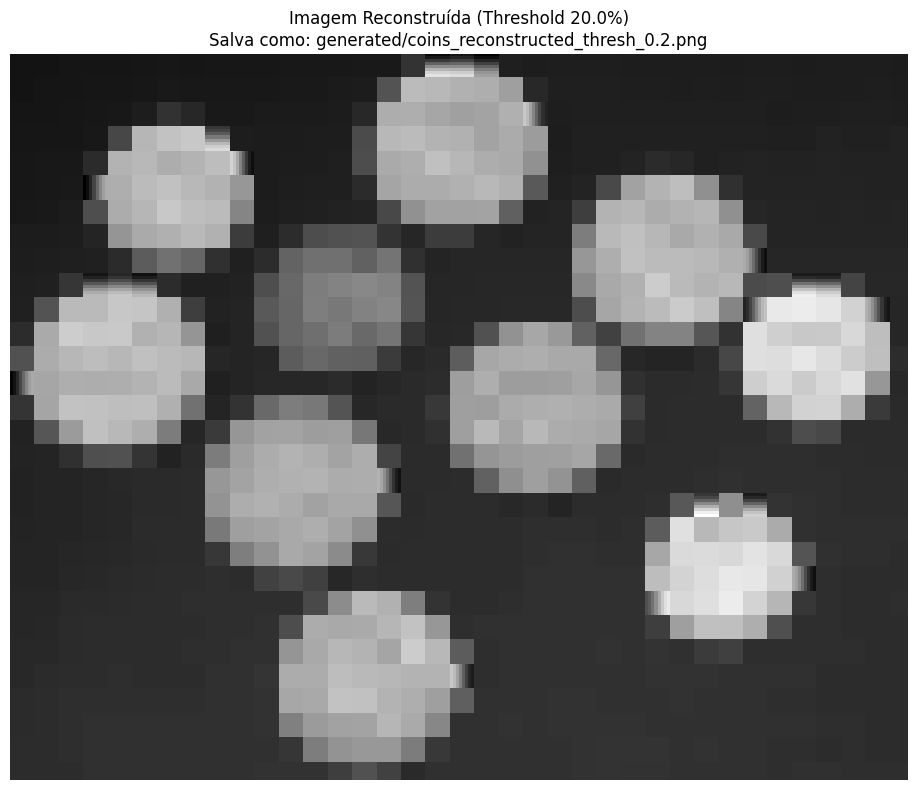

In [173]:
# Salva a imagem reconstruída com threshold 0.2
output_path_thresh_02 = 'generated/coins_reconstructed_thresh_0.2.png'
os.makedirs('generated', exist_ok=True)

# Converte para uint8 e salva
im_save_02 = im_reconstructed_thresh_02.astype(np.uint8)
Image.fromarray(im_save_02).save(output_path_thresh_02)

print(f"Imagem reconstruída salva em: {output_path_thresh_02}")

# Visualiza a imagem salva
plt.figure(figsize=(10, 8))
plt.imshow(im_save_02, cmap='gray')
plt.title(f'Imagem Reconstruída (Threshold {thresh_02*100}%)\nSalva como: {output_path_thresh_02}')
plt.axis('off')
plt.tight_layout()
plt.show()


### Comparação entre os dois thresholds (0.01 e 0.2)

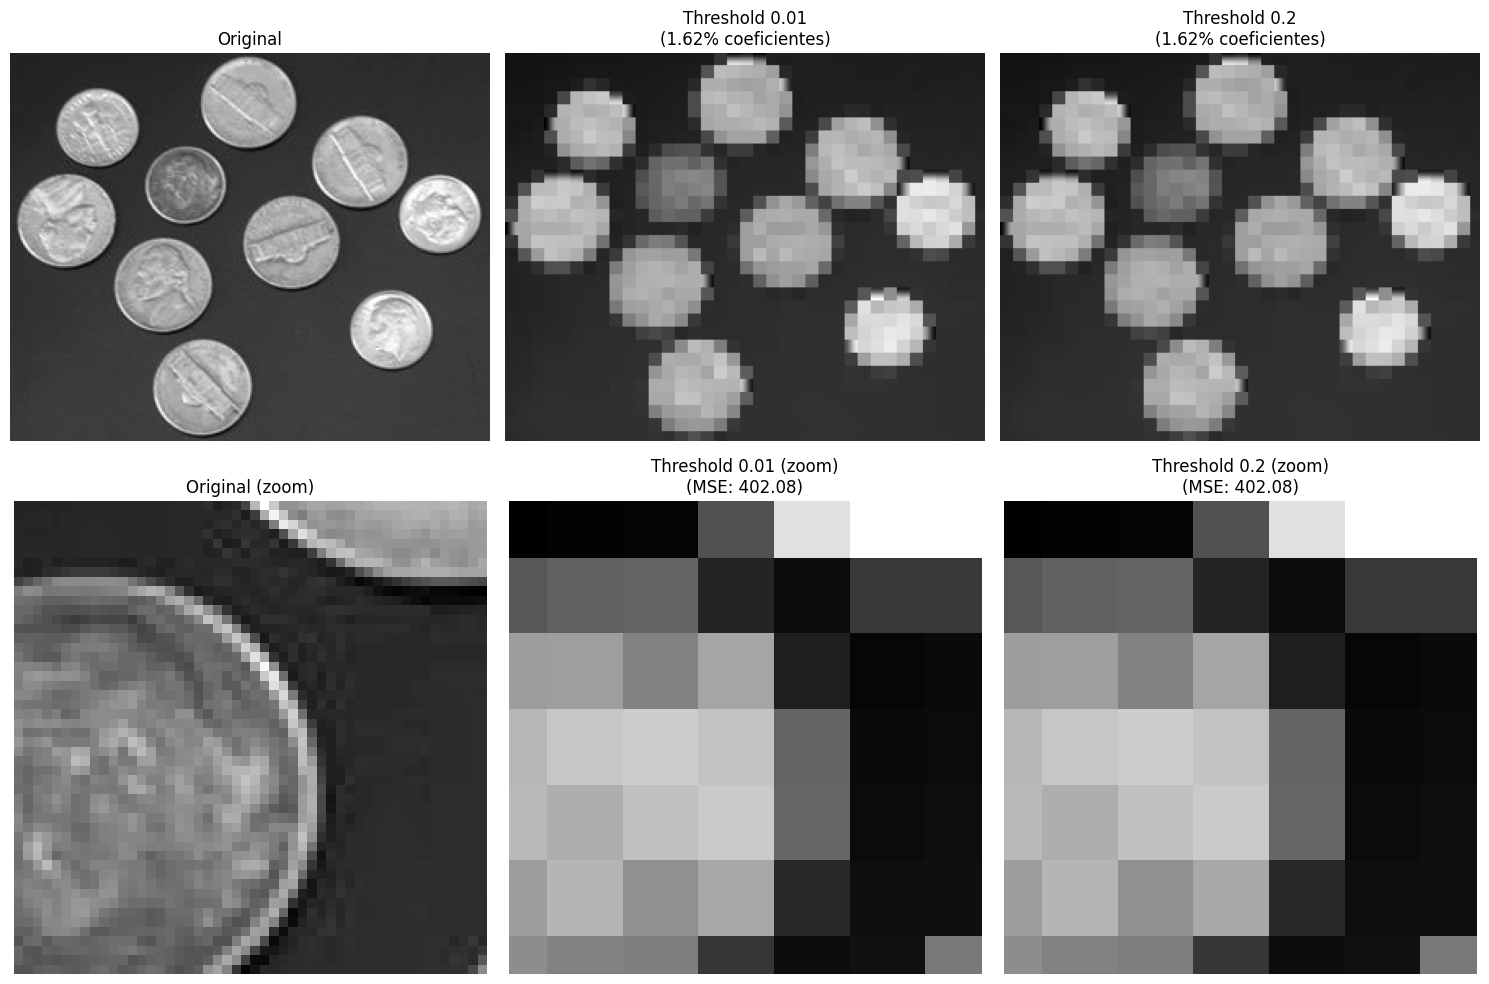


COMPARAÇÃO ENTRE THRESHOLDS
Métrica                        Threshold 0.01       Threshold 0.2       
----------------------------------------------------------------------
Coeficientes utilizados                      1.62%               1.62%
Coeficientes descartados                    98.38%              98.38%
MSE                                        402.08             402.08
PSNR (dB)                                   22.09              22.09


In [174]:
# Comparação entre os dois thresholds (0.01 e 0.2)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Linha 1: Imagens completas
axes[0, 0].imshow(im, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(im_reconstructed_thresh, cmap='gray')
axes[0, 1].set_title(f'Threshold 0.01\n({percent_nonzeros*100:.2f}% coeficientes)')
axes[0, 1].axis('off')

axes[0, 2].imshow(im_reconstructed_thresh_02, cmap='gray')
axes[0, 2].set_title(f'Threshold 0.2\n({percent_nonzeros_02*100:.2f}% coeficientes)')
axes[0, 2].axis('off')

# Linha 2: Zoom na região selecionada
y1, y2, x1, x2 = zoom_region
axes[1, 0].imshow(im[y1:y2, x1:x2], cmap='gray')
axes[1, 0].set_title(f'Original (zoom)')
axes[1, 0].axis('off')

axes[1, 1].imshow(im_reconstructed_thresh[y1:y2, x1:x2], cmap='gray')
axes[1, 1].set_title(f'Threshold 0.01 (zoom)\n(MSE: {mse:.2f})')
axes[1, 1].axis('off')

axes[1, 2].imshow(im_reconstructed_thresh_02[y1:y2, x1:x2], cmap='gray')
axes[1, 2].set_title(f'Threshold 0.2 (zoom)\n(MSE: {mse_02:.2f})')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Tabela comparativa
print("\n" + "="*70)
print("COMPARAÇÃO ENTRE THRESHOLDS")
print("="*70)
print(f"{'Métrica':<30} {'Threshold 0.01':<20} {'Threshold 0.2':<20}")
print("-"*70)
print(f"{'Coeficientes utilizados':<30} {percent_nonzeros*100:>18.2f}% {percent_nonzeros_02*100:>18.2f}%")
print(f"{'Coeficientes descartados':<30} {(1-percent_nonzeros)*100:>18.2f}% {(1-percent_nonzeros_02)*100:>18.2f}%")
print(f"{'MSE':<30} {mse:>18.2f} {mse_02:>18.2f}")
print(f"{'PSNR (dB)':<30} {psnr:>18.2f} {psnr_02:>18.2f}")
print("="*70)


### Respostas:

**a) Percentual de coeficientes efetivamente utilizados:**

O percentual de coeficientes utilizados após aplicar o threshold de 0.2 é mostrado acima. Com um threshold maior (20% ao invés de 1%), uma quantidade significativamente menor de coeficientes é mantida, resultando em maior compressão mas também maior perda de qualidade.

**b) Impressão visual sobre o resultado:**

Com o threshold de 0.2, a imagem reconstruída apresenta:

- **Maior compressão**: Menos coeficientes são mantidos, resultando em maior redução de dados, e perda observável de qualidade
- **Maior perda de qualidade**: A perda de detalhes é mais perceptível comparada ao threshold de 0.01
- **Artefatos de compressão**: Aparecem blocos visíveis (blocking artifacts) especialmente em regiões com muitos detalhes
- **Suavização mais acentuada**: Bordas e texturas ficam degradadas

**Comparação com threshold 0.01:**
- O threshold de 0.2 mantém muito menos coeficientes
- A qualidade visual é significativamente inferior
- O método ainda é eficiente para compressão, mas a qualidade normalmente não é aceitável
- Este threshold mais agressivo demonstra o trade-off entre compressão e qualidade no processamento de imagens
